In [1]:
import numpy as np

In [2]:
def mean(values):
    return sum(values) / float(len(values))

In [3]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values]) / float(len(values))

In [4]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar / float(len(x))

In [5]:
def coefficients(x, y):
    x_mean, y_mean = mean(x), mean(y)
    theta1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    theta0 = y_mean - theta1 * x_mean
    return [theta0, theta1]

In [6]:
data = [[2, 1], [3, 4], [5, 3], [7, 6]]
xt = [row[0] for row in data]
yt = [row[1] for row in data]

In [7]:
theta0, theta1 = coefficients(xt, yt)

In [8]:
theta0, theta1

(0.18644067796610164, 0.7796610169491526)

In [9]:
def LR_predict(theta0, theta1, test):
    predict = list()
    for x in test:
        h = theta0 + theta1 * x
        predict.append(h)
    return predict    

In [10]:
test = [4,8,9]

In [11]:
LR_predict(theta0, theta1, test)

[3.305084745762712, 6.423728813559322, 7.203389830508474]

In [12]:
def simple_linear_regression(train, test):
    predict = list()
    theta0, theta1 = coefficients(train)
    for row in test:
        h = theta0 + theta1 * row
        predict.append(h)
    return predict

In [13]:
class SLR:

    def __init__(self):
        pass
    
    def fix(self, x, y):
        self.theta0, self.theta1 = SLR.coef(self, x, y)
       
    def predict(self, test):
        predict = list()
        for x in test:
            h = self.theta0 + self.theta1 * x
            predict.append(h)
        return predict  
    
    def mean(self, values):
        self.contents = sum(values) / float(len(values))
        return self.contents
   
    def variance(values, mean):
        return sum([(x-mean)**2 for x in values]) / float(len(values))
    
    def covariance(x, mean_x, y, mean_y):
        covar = 0.0
        for i in range(len(x)):
            covar += (x[i] - mean_x) * (y[i] - mean_y)
        return covar / float(len(x))

    def coef(self, x, y):
        x_mean, y_mean = SLR.mean(self, x), SLR.mean(self, y)
        self.theta1 = SLR.covariance(x, x_mean, y, y_mean) / SLR.variance(x, x_mean)
        self.theta0 = y_mean - self.theta1 * x_mean
        return [self.theta0, self.theta1]
    

In [14]:
xx = SLR()

In [15]:
xx.fix(xt, yt)

In [16]:
xx.predict(test)

[3.305084745762712, 6.423728813559322, 7.203389830508474]

In [17]:
xx.mean(test)

7.0

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
data1 = pd.read_csv('AgeBloodPressure.csv')

In [20]:
data1.head()

,Age,BloodPressure
0,39,144
1,47,220
2,45,138
3,47,145
4,65,162


In [21]:
#data = [[2, 1], [3, 4], [5, 3], [7, 6]]
X1 = data1.iloc[:, 0]
y1 = data1.iloc[:, 1]

In [22]:
t0, t1 = coefficients(X1, y1)

In [23]:
t0, t1

(98.71471813821842, 0.9708703514427236)

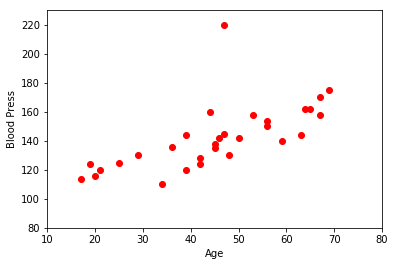

In [24]:
plt.scatter(X1, y1, color = 'red')
plt.xlabel('Age')
plt.ylabel('Blood Press')
plt.ylim(80,230)
plt.xlim(10,80)
plt.show()

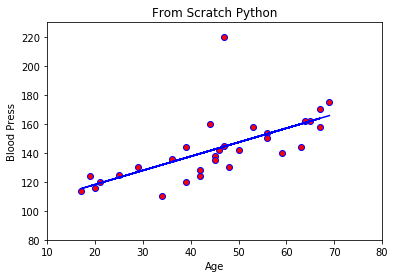

In [25]:
plt.plot(X1, LR_predict(t0, t1, X1), color = 'blue')

plt.scatter(X1, y1,  marker='o', c='r', edgecolor='b')
plt.title('From Scratch Python')
plt.xlabel('Age')
plt.ylabel('Blood Press')
plt.ylim(80,230)
plt.xlim(10,80)
plt.show()

In [26]:
LR_predict(t0, t1, test)

[102.59819954398931, 106.4816809497602, 107.45255130120293]

In [27]:
xx.fix(X1, y1)

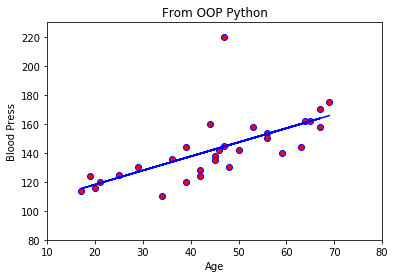

In [28]:
plt.plot(X1, xx.predict(X1), color = 'blue')

plt.scatter(X1, y1,  marker='o', c='r', edgecolor='b')
plt.title('From OOP Python')
plt.xlabel('Age')
plt.ylabel('Blood Press')
plt.ylim(80,230)
plt.xlim(10,80)
plt.show()